In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the iris datasets
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

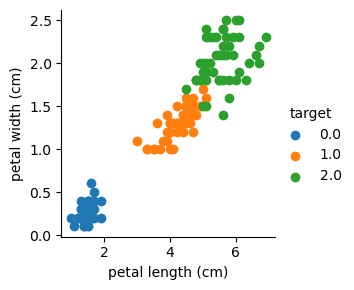

In [6]:
sns.FacetGrid(df, hue="target").map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [12]:
# Apply on Iris Dataset

# fit a CART model to the data
#model = DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

model.fit(iris.data, iris.target)
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [13]:
model.score(iris.data, iris.target)

0.9733333333333334

Make predictions

In [14]:
expected = iris.target
predicted = model.predict(iris.data)

Summarize the fit of the model

In [15]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
